<h1><center>Instituto Tecnológico y de Estudios Superiores de Occidente</center></h1>

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="200">

## **Maestría en Ciencia de Datos**

### INVESTIGACION DESARROLLO E INNOVACION III

<h3>Segmentación de prendas de vestir por medio de la utilización de algoritmos de Vision por Computadora y <i>Deep Learning</i></h3>
</center>

<div style="text-align: right">
<h5>
<right>

**Asesor:**
Dr. Jaime Emmanuel Alcalá Temores

**Alumno:**
Alex Medina Anguiano

<right>
</h5>
</div>

## Exploración de los datos

In [138]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

Se cargan los metadatos de el conjunto de datos a utilizar.

In [139]:
imagesdata = pd.read_csv("/Users/alex/Documents/GitHub/IDI/CV/data_raw/clothing-dataset-1/images.csv")
imagesdata

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False
...,...,...,...,...
5398,dfd4079d-967b-4b3e-8574-fbac11b58103,204,Shorts,False
5399,befa14be-8140-4faf-8061-1039947e329d,204,Body,True
5400,5379356a-40ee-4890-b416-2336a7d84061,310,Shorts,False
5401,65507fb8-3456-4c15-b53e-d1b03bf71a59,204,Shoes,False


### Estudia todos los atributos: 
1. Nombres
2. Tipos de datos (categóricos/numéricos, enteros/puno flotante, restringidos o no restringidos, estructurados o no estructurados, etc).
3. Porcentaje de datos perdidos.
4. Ruido y su tipo (meramente estocástico, debido a error de redondeo, outliers posibles, o imposibles como pesos negativos, edades de 200 años, fechas imposibles, etc.) (N/A)
5. Tipo de distribución de los datos.

Nombres de los atributos

In [140]:
imagesdata.columns

Index(['image', 'sender_id', 'label', 'kids'], dtype='object')

Tipo de dato de los atributos

In [141]:
imagesdata.dtypes

image        object
sender_id     int64
label        object
kids           bool
dtype: object

En este caso estamos observando los tipos de datos de los metadatos, sin embargo el resultado original no es tan diferente de los atributos presentes en el archivo de metadatos. Los tipos de datos originales son:

| atributo  | tipo     |
| --------- | -------- | 
| image     |   imagen |
| sender_id |    int64 |
| label     |   string/categorical |
| kids      |     bool |

In [142]:
imagesdata['label'] = imagesdata['label'].astype(str) 

Porcentaje de datos perdidos.

In [143]:
imagesdata.isnull().sum()

image        0
sender_id    0
label        0
kids         0
dtype: int64

Como se puede observar no existen valores perdidos en el conjunto de datos de los metadatos.
Sin embargo dentro de las etiquetas de las imágenes se pueden observar dos categorías que podrían tomarse como valores nulos en el contexto de que no se encuentra clasificado de manera correcta. Estas etiquetas son `Not sure` y `Other`.

In [144]:
nanvals = imagesdata['label'].replace({'Not sure': np.nan, 'Other': np.nan}).isnull().sum()
nanvals

295

Text(0.5, 1.0, 'Pseudo Nan values')

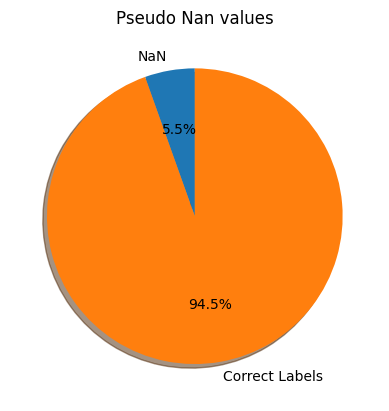

In [145]:
plt.pie([nanvals, imagesdata['label'].size - nanvals], labels=['NaN', 'Correct Labels'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Pseudo Nan values")

Tipo de distribución de los datos.

<AxesSubplot:>

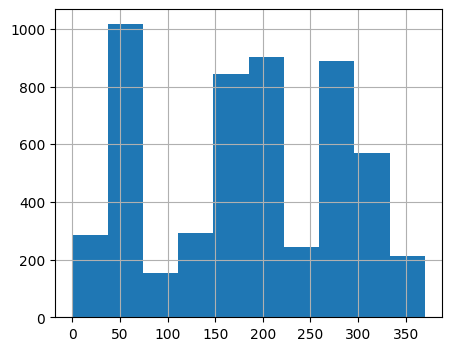

In [146]:
plt.figure(figsize=(5,4))
imagesdata['sender_id'].hist()

<AxesSubplot:>

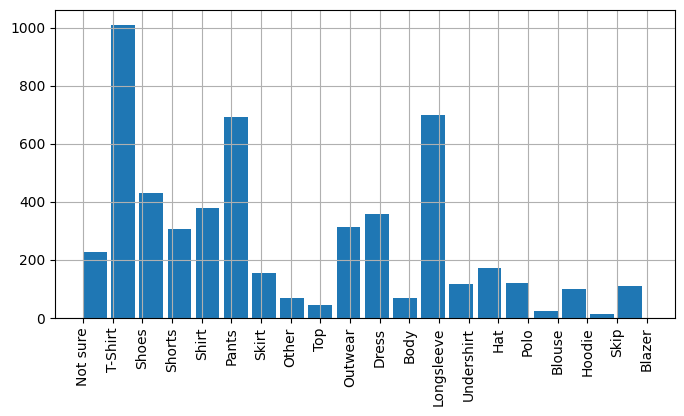

In [147]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
imagesdata['label'].hist(bins=20, width = 0.8)


<AxesSubplot:>

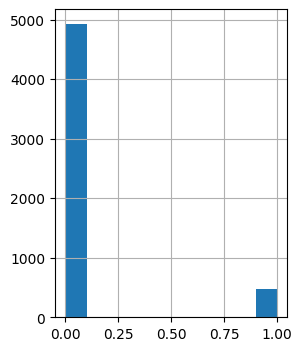

In [148]:
plt.figure(figsize=(3,4))
imagesdata['kids'].astype(int).hist()

### Para algoritmos de supervisión, identifica la/las variables objetivo.

In [149]:
y = imagesdata['label']
y

0       Not sure
1        T-Shirt
2       Not sure
3        T-Shirt
4          Shoes
          ...   
5398      Shorts
5399        Body
5400      Shorts
5401       Shoes
5402       Skirt
Name: label, Length: 5403, dtype: object

La variable objetivo es el atributo `label`.

### Visualiza los datos.

In [150]:
imagesdata.groupby(['kids']).count()

,image,sender_id,label
kids,,,
False,4927,4927,4927
True,476,476,476


Text(0.5, 1.0, 'Kids clothing distribution')

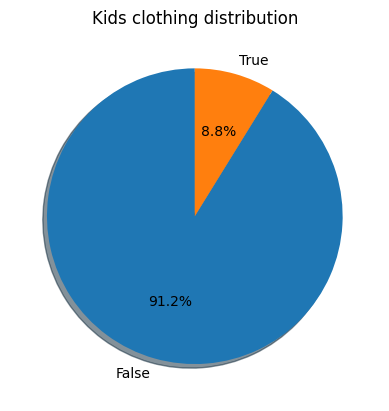

In [151]:
plt.pie(imagesdata.groupby(['kids']).count()['image'], labels=imagesdata.groupby(['kids']).count().index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Kids clothing distribution")

Se identifica que la mayoría de la observaciones del conjunto de datos representan prendas para adultos (con el 91.2% de las entradas) y a penas casi un décimo de los valores son prendas de niños.

In [152]:
imagesdata.groupby(['label']).count()

,image,sender_id,kids
label,,,
Blazer,109,109,109
Blouse,23,23,23
Body,69,69,69
Dress,357,357,357
Hat,171,171,171
Hoodie,100,100,100
Longsleeve,699,699,699
Not sure,228,228,228
Other,67,67,67


Text(0.5, 1.0, 'Kids clothing distribution')

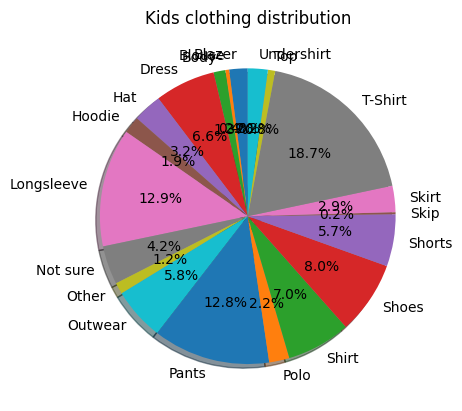

In [153]:
plt.pie(imagesdata.groupby(['label']).count()['image'], labels=imagesdata.groupby(['label']).count().index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Kids clothing distribution")

In [154]:
imagesdata.groupby(['label']).count()['image'].sort_values(ascending=False)[0:5]

label
T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Name: image, dtype: int64

In [155]:
imagesdata.groupby(['label']).count()['image'].sort_values(ascending=False)[0:5].sum()*100/imagesdata['label'].size

59.42994632611512

Se puede observar que aproximadamente un 60% de las imágenes se encuentran contenidas en solo 5 de las clases, lo cual podría representar una desventaja al momento de realizar el entrenamiento ya que significaría que se entrenaría con datos desbalanceados.

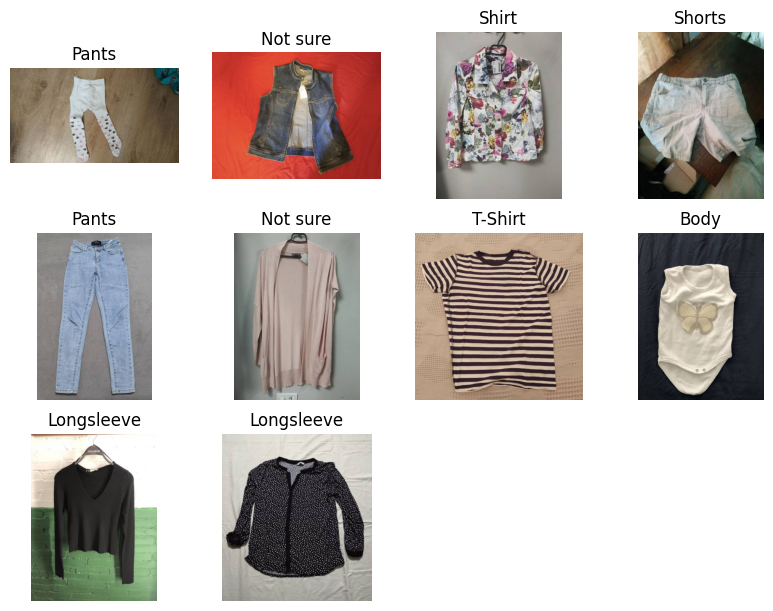

In [156]:
n = 10
pathim = '/Users/alex/Documents/GitHub/IDI/CV/data_raw/clothing-dataset-1/images_compressed'
plt.figure(figsize=(10, 10))

for i in range(10):
    randomindex = np.random.randint(0, imagesdata['label'].size)
    img_path = imagesdata['image'][randomindex] + '.jpg'
    label = imagesdata['label'][randomindex]
    complete_path = pathim + '/' + img_path
    image = mpimg.imread(complete_path)
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(label)

En la figura anterior se puede apreciar una muestra aleatoria de las imágenes contenidas en el conjunto de datos.

### Estudia la correlación (u otras dependencias no lineales; por ejemplo esto) entre atributos.

In [157]:
imagesdata.corr()

,sender_id,kids
sender_id,1.000000,0.129604
kids,0.129604,1.000000


In [158]:
imagesdata.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,image,sender_id,label,kids
image,1.000000,0.805876,0.021518,-0.057111
sender_id,0.805876,1.000000,0.047544,-0.121592
label,0.021518,0.047544,1.000000,0.048373
kids,-0.057111,-0.121592,0.048373,1.000000


Al tratarse una base de datos con pocos atributos y aun menos atributos numéricos, el estudio de correlación no proporciona mucha información sobre la relación lineal.

### Estudia cómo podrías resolver el problema manualmente.


> Para resolver este problema manualmente se necesitaría la intervención humana para observar cada imagen individualmente y asignar la categoría correspondiente de acuerdo a lo que observe. Este proceso podría proporcionar un resultado un poco más confiable pero el tiempo para llevar a cabo la tarea seria considerablemente mayor.

### Estudia las transformaciones que podrías aplicar (e.g., si una log-transformación vuelve normales los datos, sería mejor).

> Por la naturaleza del problema no se requieren transformaciones convencionales que usualmente se utilicen en conjuntos numericos para eliminar sesgos o centrar una distribucion. Sin embargo despues de observar las muestras de la imagenes generadas en pasos anteriores, es muy posible que la solucion se pueda beneficiar de transformaciones de preprocesado de imagenes, como el reescalamiento, acentuacion de chanales de colores, eliminacion del fondo y preservacion unicamente de la prenda, entre otras.

### Identifica si obtener más datos podría ser útil.


> Al tratarse de un conjunto de 5000 imágenes diferentes, es muy posible que el tamaño del mismo sea un poco reducido, usualmente entrenar un modelo para este contexto requiere de una conjunto mayor de observaciones.

## Preparación de los datos

### Notas
<blockquote>

Trabaja en copias de los datos (deja el original intacto).  
Escribir funciones para todas las transformaciones que apliques, de tal manera que:  
- Puedas aplicarlo fácilmente la próxima vez que tengas datos frescos 
- Apliques las mismas transformaciones en futuros proyectos  
- Limpies y prepares el conjunto de prueba  
</blockquote>

### Limpieza de datos
Arreglar o remover outliers  
Rellenar datos perdidos (e.g., usando imputación múltiple, la media, o la mediana), o quitar las filas o columnas con NAs

> Al tratarse de conjunto de datos tan simple (imagen y etiqueta), no hace falta realizar este paso.

### Selección/ingeniería de características
Remueve los atributos/variables que no proveen información para la tarea (opcional)  
Discretiza variables continuas, etc.  
Descompón características  
Añade transformaciones prometedoras (e.g., log-transformar, transformar con raíz cuadrada, etc., para volver normal).

> Al tratarse de conjunto de datos tan simple (imagen y etiqueta), no hace falta realizar este paso.

### Normaliza o estandariza las características
E.g., Unit-based normalization.  
Esto es importante cuando tienes variables de diferentes escalas

> Al tratarse de conjunto de datos tan simple (imagen y etiqueta), no hace falta realizar este paso.